# 스포티파이 인기도 예측
2023.10.29 ~ 2023.11.05

## 1. 데이터셋 개요

- 제목: Spotify Popularity Prediction
- 설명: Regression problem intended to predict the popularity of a track
- 출처: Kaggle (https://www.kaggle.com/competitions/spotify-popularity-prediction-v2/data)

## 2. 데이터셋 불러오기

### 2-1. 데이터셋 로딩 및 전체적인 분포 확인

In [1]:
import pandas as pd

music_df = pd.read_csv('train.csv')
music_df.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [2]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

Dataset Description이 포르투갈어로 되어 있어서 파파고를 이용해서 한국어로 번역해 보면 아래와 같다.
- id: 스포티파이 하단에 있는 음악 식별자
- artists : 아티스트명
- name : 곡명
- year : 출시년도
- release_date: Year-Month-Day로 인코딩된 음악의 발매일. 그동안 모든 곡이 완전한 정보를 가지고 있는 것은 아니기 때문에 예를 들어 연도만 포함하고 있을 가능성이 있습니다.
- acousticness : 음악이 음향적인 한 0과 1 사이에 있습니다.
- danceability : 음악이 춤을 출 수 있는 한 0과 1 사이입니다.
- duration_ms : 밀리세컨드(1000분의 1초) 단위의 지속 시간.
- energy : 음악이 에너지인 한 에너지는 0에서 1사이입니다.
- explicit : 음악에 명시적인 내용의 문자가 포함되어 있으면 1, 그렇지 않으면 0.
- instrumentalness : 0과 1사이의 음악이 얼마나 기악적인지.
- key : 음악의 음색, 여기 지도.
- liveness : 0과 1사이에서 라이브 음악은 얼마인가요.
- loudness : 음악의 볼륨이 얼마나 큰가요. 그 값은 보통 -60에서 0사이로 데시벨의 양을 나타냅니다.
- mode : 음악이 높은 톤이면 1, 낮은 톤이면 0. 높은 톤이면 행복한 노래로, 낮은 톤이면 더 슬픈 노래로 여겨집니다.
- speechiness : 음악이 발성/음성화되는 한 0과 1 사이입니다.
- tempo : 분당 비트 수(BPM)의 뮤직 타임
- valence : 0과 1 사이에서 음악의 긍정성을 설명하는데, 긍정적인 음악에 대한 가치는 높고(행복, 명랑, 행복감 등), 부정적인 음악에 대한 가치는 낮음(슬픔, 분노 등)
- popularity : 0~100, 음악 인기도 이번 세트에서는 목표 변수입니다.

### 2-2. 음악의 발매 연도 분포 확인

In [3]:
music_df['year'].describe()

count    129172.000000
mean       1976.579762
std          26.722407
min        1920.000000
25%        1955.000000
50%        1977.000000
75%        1998.000000
max        2021.000000
Name: year, dtype: float64

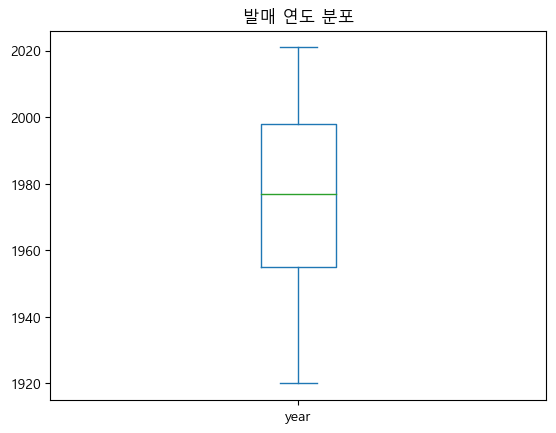

In [4]:
import matplotlib.pyplot as plt

music_df['year'].plot(
    kind='box',
    title='발매 연도 분포'
)
plt.show()

1960년대 ~ 1990년대 데이터가 다수이며 가장 최신 연도는 2021년으로 확인된다.

### 2-3. 음악의 특성 분포 확인

In [5]:
music_df.drop('year', axis=1).describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
count,129172.000000,129172.000000,1.291720e+05,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000
mean,0.501950,0.536076,2.328895e+05,0.481096,0.067956,0.194286,5.207050,0.211519,-11.767025,0.703868,0.105871,116.943154,0.525167,25.915539
std,0.379088,0.175803,1.492669e+05,0.271778,0.251671,0.332443,3.516778,0.180989,5.679598,0.456552,0.182878,30.348323,0.264451,21.876377
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091800,0.414000,1.662930e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.905000,0.000000,0.035100,93.755500,0.311000,1.000000
50%,0.523000,0.547000,2.056665e+05,0.463000,0.000000,0.000482,5.000000,0.138000,-10.868000,1.000000,0.045400,115.639500,0.537000,26.000000
75%,0.895000,0.668000,2.658400e+05,0.707000,0.000000,0.234000,8.000000,0.270000,-7.532000,1.000000,0.076300,135.014000,0.744000,42.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.971000,243.507000,1.000000,96.000000


- ```acousticness```, ```danceability```, ```energy```, ```explicit```, ```instrumentalness```, ```liveness```, ```mode```, ```speechiness```, ```valence```의 9개 컬럼이 0 이상 1 이하의 분포를 가지고 있다.
- ```duration_ms```는 지수로 표현될 정도로 큰 값을 가지고 있다.
- ```key```는 0 이상 11 이하의 정수로 표현되어 있다.
- ```loudness```는 -60부터 0까지라고 description에 적혀 있으나 최댓값으로 약 3.9를 가지는 행도 있다.
- ```tempo```는 0 이상으로 나타나 있고 가장 높은 값이 243.5인 것으로 보아 BPM을 나타내는 듯하다.
- ```popularity``` 0 이상 100 이하의 분포를 가지고 있다.

In [6]:
music_df[[
    'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'valence'
]].describe()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,mode,speechiness,valence
count,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000
mean,0.501950,0.536076,0.481096,0.067956,0.194286,0.211519,0.703868,0.105871,0.525167
std,0.379088,0.175803,0.271778,0.251671,0.332443,0.180989,0.456552,0.182878,0.264451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091800,0.414000,0.248000,0.000000,0.000000,0.099300,0.000000,0.035100,0.311000
50%,0.523000,0.547000,0.463000,0.000000,0.000482,0.138000,1.000000,0.045400,0.537000
75%,0.895000,0.668000,0.707000,0.000000,0.234000,0.270000,1.000000,0.076300,0.744000
max,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971000,1.000000


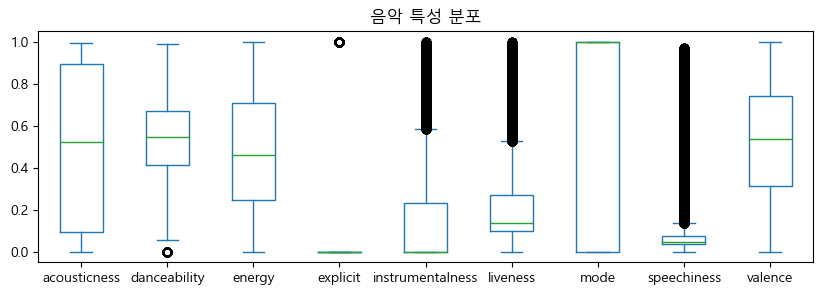

In [7]:
music_df[[
    'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'valence'
]].plot(
    kind='box',
    figsize=(10,3),
    title='음악 특성 분포'
)

plt.show()

우선 0 이상 1 이하의 분포를 가지는 9개 컬럼들의 분포를 확인해보았다.

C:\Users\louis\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


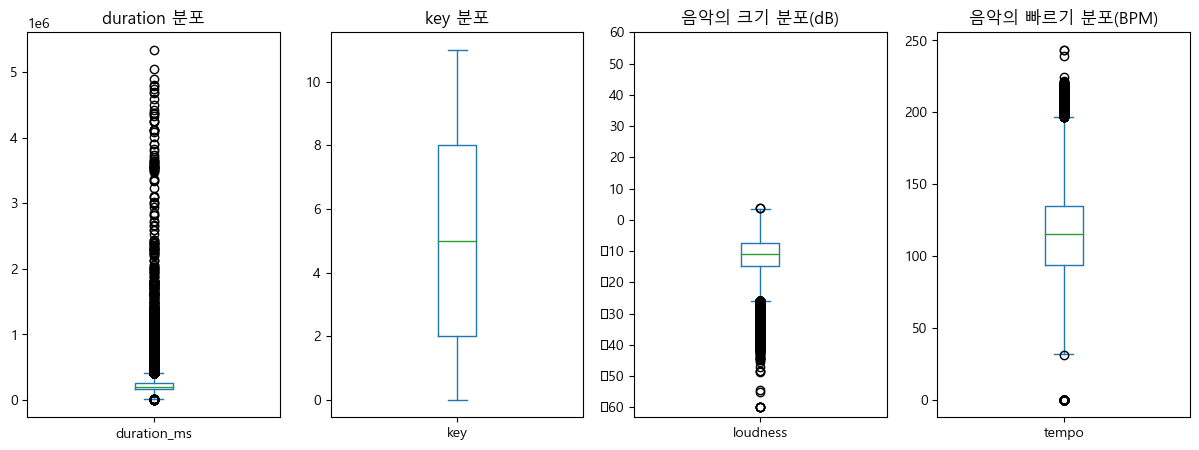

In [8]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15,5))

music_df['duration_ms'].plot(
    kind='box',
    title='duration 분포',
    ax=axes[0]
)

music_df['key'].plot(
    kind='box',
    title='key 분포',
    ax=axes[1]
)

music_df['loudness'].plot(
    kind='box',
    title='음악의 크기 분포(dB)',
    yticks=[i for i in range(-60, 70, 10)],
    ax=axes[2]
)

music_df['tempo'].plot(
    kind='box',
    title='음악의 빠르기 분포(BPM)',
    ax=axes[3]
)

plt.show()

이어서 다른 컬럼들의 분포도 확인해보았다. ```duration_ms```는 무엇을 나타내는 지표인지 잘 모르겠다. 음악의 크기(```loudness```)는 -10 근방에 뭉쳐있고, 음악의 빠르기(```tempo```)는 약 120BPM 정도에 몰려있음을 확인할 수 있다.

근데 BPM이 0인 애는 뭘까...

In [9]:
music_df[music_df['tempo'] == 0]

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
4414,0zr7DJGTPUfAUmjM7crmt2,['Connie Francis'],Hava Nagilah,1960,0.00000,0.0,179466,0.000000,0,0.000000,0,0.0000,-60.000,0,1960-01-01,0.0,0.0,0.0,12
6964,1C0h4SvAveezqMSeAo86XA,"['White Noise Baby Sleep', 'White Noise for Ba...",The Early Morning Rain,2015,0.13900,0.0,87874,0.955000,0,0.997000,0,0.4250,-20.356,1,2015-06-06,0.0,0.0,0.0,67
7515,2LW9qKX9SwmpyMl9bU0rX7,['Lata Mangeshkar'],"Aai Aai Raat Suhani, Pt. 1",1952,0.99200,0.0,179959,0.221000,0,0.196000,4,0.1360,-17.252,1,1952-01-01,0.0,0.0,0.0,0
10459,42uJ8brb7vxlgXD1HeBR8W,['The Ray Conniff Singers'],Edelweiss,1966,0.86200,0.0,123667,0.176000,0,0.000003,10,0.2510,-17.547,1,1966,0.0,0.0,0.0,24
13418,2WTtJDfCUjAyCZHRSfCLDn,['Ignacio Corsini'],La Mina del Ford - Remasterizado,1924,0.99600,0.0,133947,0.025800,0,0.768000,5,0.0831,-24.894,1,1924-03-29,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126491,6QDz33bkO1vJEN0ZdrzEqb,['Players_Select'],"Game over (From ""Streets of Rage"") [Genesis Mix]",1920,0.73400,0.0,6250,0.467000,0,0.993000,2,0.0000,-8.288,1,1920-01-04,0.0,0.0,0.0,0
128490,0BEGv9OVHC33uI0jBeWMIZ,"['Sergei Prokofiev', 'William Kapell']","Sonata No. 7 in B-Flat, Op. 83: Allegro inquie...",1945,0.77300,0.0,497267,0.129000,0,0.098800,5,0.2840,-20.528,0,1945,0.0,0.0,0.0,0
128522,5X8Hut4pmjxDUd8bYfFqjb,['The White Noise Zen & Meditation Sound Lab'],Calm Rain Storm & Gentle White Noise,2016,0.00119,0.0,148000,0.342000,0,1.000000,9,0.3920,-14.959,0,2016-02-11,0.0,0.0,0.0,60
128837,6jbDzD5bYs1uzpDvRjCK7y,['Time Bomb Symphony'],You R Heaven,1998,0.00000,0.0,64840,0.000000,0,0.000000,2,0.0000,-60.000,1,1998,0.0,0.0,0.0,33


그냥 단순 결측치인가 싶다.

### 2-4. 인기도(종속변수) 분포 확인

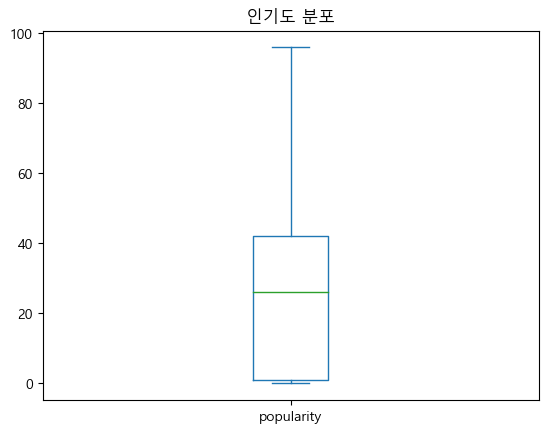

In [10]:
music_df['popularity'].plot(
    kind='box',
    title='인기도 분포'
)
plt.show()

30 근방에 가장 많은 데이터가 분포하고 있고, 대부분의 데이터가 40 이하에 몰려있다.

## 3. 데이터 전처리

### 3-1. 상관관계 알아보기

C:\Users\louis\AppData\Local\Temp\ipykernel_28796\1670774256.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = music_df.corr()
C:\Users\louis\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\louis\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


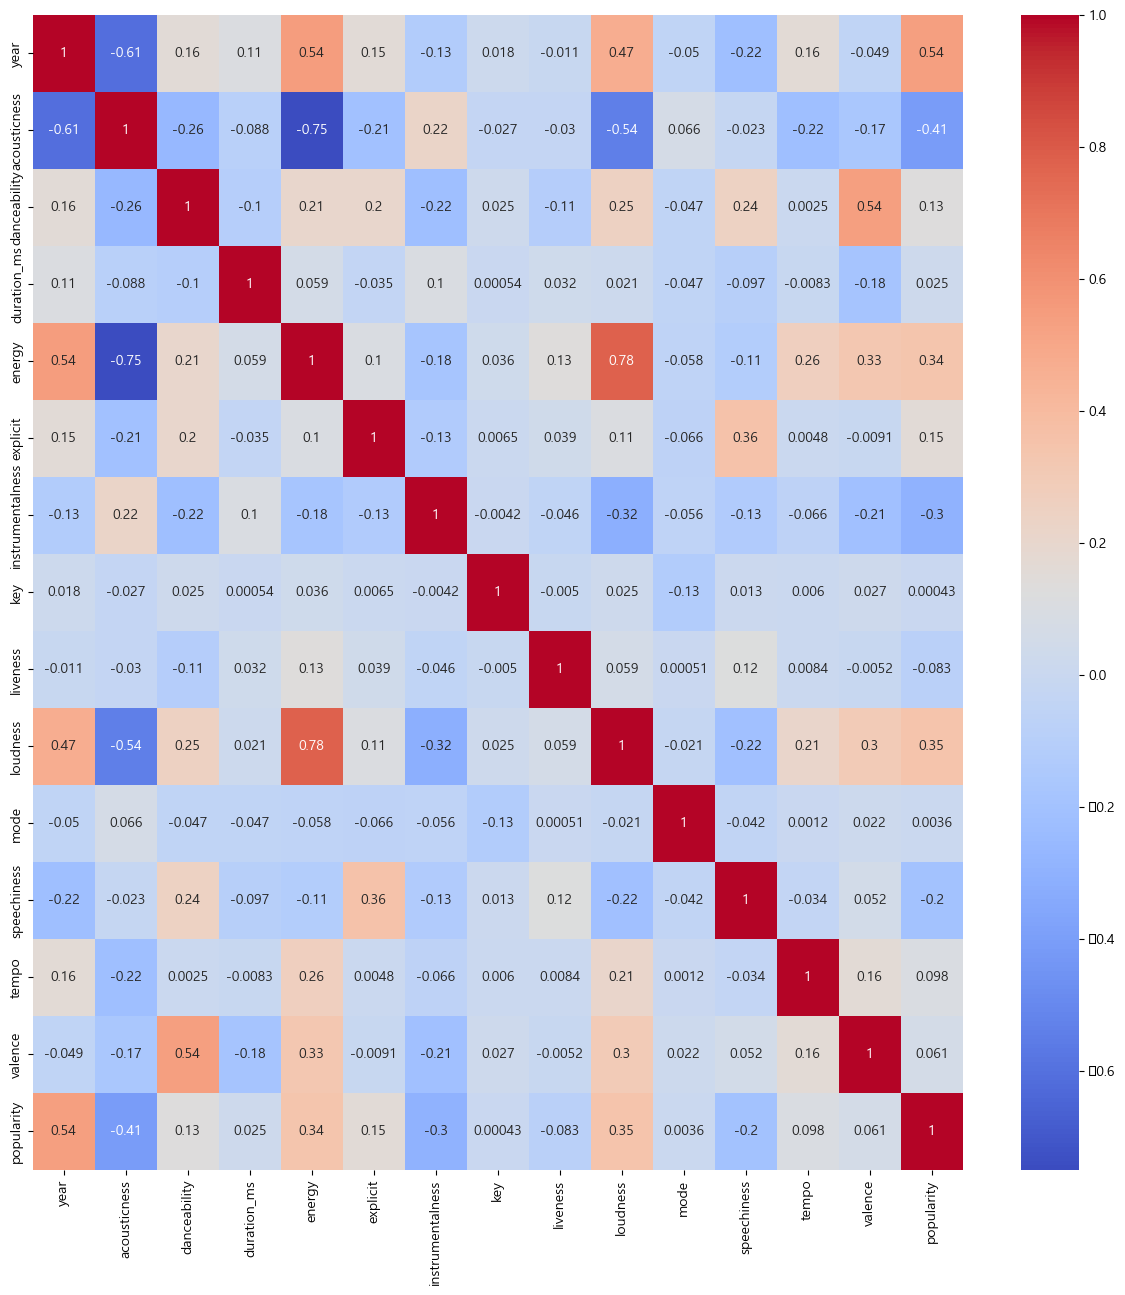

In [11]:
import seaborn as sns

plt.figure(figsize=(15,15))
correlation_matrix = music_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

눈에 띄는 점
- ```energy```와 ```loudness```의 양의 관계가 꽤 짙다. 역시 데시벨이 높을수록 에너제틱한 음악이 나오는 것 같다.
- ```energy```와 ```acousticness```의 음의 관계도 마찬가지 맥락에서, 어쿠스틱할수록 에너지는 떨어짐을 의미할 것이다.
- ```year```과 ```acousticness```에 음의 관계가 뚜렷한데 과거로 갈수록 어쿠스틱한 노래들이 많음을 나타낼 것이다.
- 종속변수인 ```popularity```와 각 변수들 간의 상관관계는 그리 뚜렷하게 나타나지 않는다. 그나마 ```year```과의 양의 관계가 보이는데, 최신 음악일수록 인기도가 높다는 것은 나날이 음악 시장에 대한 주목도가 높아지고 있음을 뜻할지도 모르겠다.

### 3-2. 컬럼 선정

입력변수들 사이에 강한 선형 관계가 존재하는 경우 **다중 공선성** 문제가 생길 수 있다. 그러므로 correlation matrix에서 선형 관계가 짙은 것으로 판별된 것들을 제외할 필요가 있다.

In [2]:
drop_features = ['id', 'artists', 'name', 'year', 'energy', 'release_date']

In [3]:
X = music_df.drop(drop_features, axis=1).drop('popularity', axis=1)
y = music_df['popularity']

print("X: ", X.columns.values, X.shape)
print("y: ", y.name, y.shape)

X:  ['acousticness' 'danceability' 'duration_ms' 'explicit' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'valence'] (129172, 12)
y:  popularity (129172,)


### 3-3. 데이터 스플릿

In [4]:
import numpy as np

# 랜덤 시드
np.random.seed(42)

In [5]:
from sklearn.model_selection import train_test_split

# train, val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(103337, 12) (25835, 12) (103337,) (25835,)


## 4. 모델 학습

### 4-1. 여러 회귀 모델 성능 비교

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# 모델 생성
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(tree_method = "hist", device = "cuda"),
    "LightGBM": LGBMRegressor(verbosity=-1, device_type='gpu') #verbosity: 그냥 돌리면 자꾸 딴 말 나와서 -1로 설정
}

In [74]:
from sklearn.metrics import mean_squared_error
from datetime import datetime

# 검증 수행 및 RMSE 평가
results = {}
for model_name, model in models.items():
    print(f"[{model_name}] ... ", end='')
    start = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[model_name] = rmse
    end = datetime.now()
    print(f"{rmse} / {end - start}")

[Linear Regression] ... 18.36382537519192 / 0:00:00.035900
[Decision Tree Regression] ... 22.348716529296073 / 0:00:01.207346
[Random Forest Regression] ... 15.84272642502856 / 0:01:54.536049
[K-Nearest Neighbors (KNN)] ... 22.004172695758697 / 0:00:00.241629
[XGBoost] ... 16.1099277161173 / 0:00:00.579730
[LightGBM] ... 16.146378482218605 / 0:00:00.591861


In [61]:
# 가장 성능 좋았던 모델 확인
pd.DataFrame(sorted(results.items(), key=lambda x:x[1]), columns=['model', 'RMSE'])

,model,RMSE
0,Random Forest Regression,15.880906
1,XGBoost,16.109928
2,LightGBM,16.146378
3,Linear Regression,18.363825
4,K-Nearest Neighbors (KNN),22.004173
5,Decision Tree Regression,22.436567


랜덤포레스트가 가장 높은 성능을 보인다. 하지만 랜덤포레스트는 넘 오래 걸린다... 그리고 나는 XGBoost와 LightGBM도 써보고 싶다.

### 4-2. 하이퍼파라미터 튜닝

#### 4-2-1. RandomForestRegressor

원래는 그리드 서치를 하려고 했으나 세션이 자꾸 터지는 관계로... 하나씩 튜닝

In [52]:
# import warnings
# warnings.filterwarnings("ignore")

# best_score = 0

# # Random Forest 모델 정의
# model = RandomForestRegressor(
#     n_estimators=300,
#     max_depth=10,
#     min_samples_split=10,
#     min_samples_leaf=3
# )

# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)
# rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# if rmse < best_score:
#     best_score = rmse

# print(rmse)

KeyboardInterrupt: 

시간 넘 많이 걸려서... 스킵합니다...

#### 4-2-2. XGBoost

In [55]:
import warnings
warnings.filterwarnings("ignore")

# XGBoost 모델 정의
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
best_score = rmse
# if rmse < best_score:
#     best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.983385931653038 [BEST]


In [56]:
# XGBoost 모델 정의 (n_estimators)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.948014081792167 [BEST]


In [57]:
# XGBoost 모델 정의 (n_estimators)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.942823986178759 [BEST]


In [58]:
# XGBoost 모델 정의 (n_estimators)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=50,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.988554513033032 


n_estimators = 100으로 고정

In [59]:
# XGBoost 모델 정의 (max_depth)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=15,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.168171829837764 


In [60]:
# XGBoost 모델 정의 (max_depth)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.007657985510356 


max_depth = 10으로 고정

In [61]:
# XGBoost 모델 정의 (learning_rate)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.01
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 17.28333435853386 


In [62]:
# XGBoost 모델 정의 (learning_rate)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.15
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.031474288380334 


In [63]:
# XGBoost 모델 정의 (learning_rate)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.12
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.954337282866812 


In [64]:
# XGBoost 모델 정의 (learning_rate)
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.942823986178759 [BEST]


learning_rate = 0.1로 고정

최종: n_estimators=100, max_depth=10, learning_rate=0.1

#### 4-2-3. LightGBM

In [65]:
# LightGBM 모델 정의
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
best_score = rmse
# if rmse < best_score:
#     best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.04303116315253 [BEST]


In [66]:
# LightGBM 모델 정의 (n_estimators)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.999142551276 [BEST]


In [67]:
# LightGBM 모델 정의 (n_estimators)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=700,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.973448672999686 [BEST]


In [68]:
# LightGBM 모델 정의 (n_estimators)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.963961904027164 [BEST]


In [72]:
# LightGBM 모델 정의 (n_estimators)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1200,
    max_depth=10,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.96957985393572 


n_estimators = 1000으로 고정

In [77]:
# LightGBM 모델 정의 (max_depth)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=11,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.96333670466371 [BEST]


In [78]:
# LightGBM 모델 정의 (max_depth)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.1
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.987779951911675 


max_depth = 12로 고정

In [79]:
# LightGBM 모델 정의 (learning_rate)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.01
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.166911251847864 


In [83]:
# LightGBM 모델 정의 (learning_rate)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.2
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 16.161880016115823 


In [84]:
# LightGBM 모델 정의 (learning_rate)
model = LGBMRegressor(
    verbosity=-1,
    device_type='gpu',
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.11
)

# 모델 학습 및 추론
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# best score 저장
if rmse < best_score:
    best_score = rmse

print(f"모델 성능: {rmse}", end=' ')
print("[BEST]" if rmse == best_score else "")

모델 성능: 15.979452846436825 


learning_rate = 0.1로 고정

최종: n_estimators = 1000, max_depth = 12, learning_rate = 0.11

가장 우월했던 모델은

```python
XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)
```

이다. 사실 랜덤포레스트가 더 좋을 것 같은데 넘 오래 걸려서 포기했다.

## 5. 모델 추론

In [86]:
test_df = pd.read_csv('test.csv')
test_df

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.4340
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.3460
2,5chxjST0MfWZPsaHrWgiqe,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,1984-01-01,0.0352,158.734,0.4230
3,4Db6PxFIiK1a6nCEJABTHk,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,1985-11-11,0.0401,127.783,0.6950
4,3MPKTMJIxlORqcxw542HHK,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,1999-04-27,0.2660,92.003,0.8560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,['Oscar Peterson'],I Love Paris,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,1959,0.0547,142.289,0.3780
43054,3gh5bl5nBDN6ubcbxltKdr,"['Claude Debussy', 'Roger Desormière/Choeurs Y...","Pelléas et Mélisande (2006 Digital Remaster), ...",1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,1941,0.0344,97.683,0.0371
43055,6gVkG8f7ldsQs0jAI8cB4X,['Lenny LeBlanc'],There Is None Like You - Live,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,1991-01-01,0.0376,44.068,0.1730
43056,6n6OQfBpCgzF9oEg8zhBN7,['Kenny Chesney'],Get Along,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,2018-07-27,0.0503,92.456,0.3500


In [87]:
X_test = test_df.drop(drop_features, axis=1)

print("X: ", X_test.columns.values, X_test.shape)

X:  ['acousticness' 'danceability' 'duration_ms' 'explicit' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'valence'] (43058, 12)


In [89]:
model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred

array([41.76883 , 34.33905 , 33.261024, ..., 26.537388, 53.148766,
       48.01187 ], dtype=float32)

In [98]:
result_df = pd.DataFrame({'id': test_df['id'], 'popularity': y_pred})
result_df

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,41.768829
1,17TO3XH1slhDyqnwypne06,34.339050
2,5chxjST0MfWZPsaHrWgiqe,33.261024
3,4Db6PxFIiK1a6nCEJABTHk,33.384773
4,3MPKTMJIxlORqcxw542HHK,41.674240
...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,24.908617
43054,3gh5bl5nBDN6ubcbxltKdr,12.099912
43055,6gVkG8f7ldsQs0jAI8cB4X,26.537388
43056,6n6OQfBpCgzF9oEg8zhBN7,53.148766


In [99]:
result_df.to_csv('spotify_result.csv', index=False)

## 6. 후기

제출 결과는 아래와 같다.

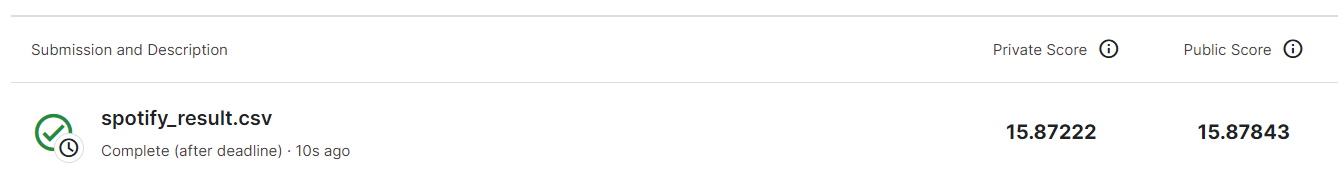

리더보드 기준 27위다.

아쉬웠던 점은 크게 두 가지다.
- 랜덤포레스트 시간 너무 많이 걸린다... GPU 가속이 시급하다.
- GridSearch를 이용하고 싶었는데 속도도 훨씬 느려지고 세션이 터지고 그랬다. 결국 손으로 하나씩 해보는 수밖에 없었다.